In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

In [2]:
# Load the data file using pandas
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=[0,124,125,126], sep=',')

#test missing value
print(df.isnull().values.any())
#where is the missing value
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)

True
     day  month  year  Temperature  RH  Ws  Rain  FFMC   DMC     DC   ISI  \
165   14      7  2012           37  37  18   0.2  88.9  12.9  14.69  12.5   

      BUI   FWI Classes  
165  10.4  fire     NaN  


In [3]:
#Lode data in aging remove row of missing value
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv",skiprows=[0,124,125,126,170], sep=',')

#test if missing value now
print(df.isnull().values.any())
missing_values = df[df.isnull().any(axis=1)]
print(missing_values)

print(np.shape(df))

False
Empty DataFrame
Columns: [day, month, year, Temperature, RH, Ws, Rain, FFMC, DMC, DC, ISI, BUI, FWI, Classes]
Index: []
(243, 14)


In [4]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not_fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not_fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not_fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not_fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not_fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not_fire
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not_fire
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not_fire


In [5]:
#Change class label to be 0 and 1, and not fire and not fire 
df = pd.get_dummies(df, columns=['Classes']) #make class 1 / k
x = df.drop('Classes_not_fire', axis=1)

print(x.head())

X = x.drop('Classes_fire', axis=1)


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI  Classes_fire  
0  0.5             0  
1  0.4             0  
2  0.1             0  
3  0.0             0  
4  0.5             0  


In [6]:
X[['day', 'month', 'year', 'Temperature', 'RH' ,'Ws', 'Rain', 'FFMC', 'DMC', 'DC','ISI', 'BUI', 'FWI']].describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000


In [7]:
#Remove the day
X = X.drop('day', axis=1)
X = X.drop('year', axis=1)
X = X.drop('month', axis=1)
X = X.rename(columns={'Temperature': 'Temp'})

G = x.drop('day', axis=1)
G = G.drop('year', axis=1)
G = G.drop('month', axis=1)
G = G.rename(columns={'Temperature': 'Temp'})
G.describe()

,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes_fire
count,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.563786
std,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.496938
min,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,1.000000
75%,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [8]:
df1 = G[G["Classes_fire"]==1]
df2 = G[G["Classes_fire"]==0]

df1 = df1.drop('Classes_fire', axis=1)
df2 = df2.drop('Classes_fire', axis=1)


In [9]:
#fire summer
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df1.describe()

,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00,137.00
mean,33.80,56.42,15.32,0.10,87.54,21.05,70.82,7.42,24.02,11.73
std,2.92,14.23,2.31,0.54,3.35,12.52,48.80,3.70,14.38,6.82
min,26.00,21.00,8.00,0.00,80.20,3.40,9.70,2.60,5.10,1.70
25%,32.00,45.00,14.00,0.00,85.30,12.10,34.10,4.70,13.70,6.30
50%,34.00,56.00,15.00,0.00,87.80,18.00,54.20,6.80,19.20,10.50
75%,36.00,66.00,17.00,0.00,89.40,25.80,96.80,9.20,30.40,15.70
max,42.00,88.00,21.00,6.00,96.00,65.90,220.40,19.00,68.00,31.10


In [10]:
#Not fire summery
df2.describe()

,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
count,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00,106.00
mean,30.03,69.31,15.72,1.62,65.32,6.45,21.79,1.28,7.22,0.96
std,3.35,12.24,3.35,2.75,13.38,5.43,27.99,0.77,6.17,1.13
min,22.00,42.00,6.00,0.00,28.60,0.70,6.90,0.00,1.10,0.00
25%,28.00,59.25,14.00,0.10,56.95,2.92,8.00,0.70,3.08,0.30
50%,30.00,71.00,15.00,0.60,68.25,4.75,9.65,1.20,5.55,0.55
75%,32.00,78.75,17.75,1.80,77.40,7.97,22.10,1.80,8.38,0.97
max,39.00,90.00,29.00,16.80,82.00,37.00,180.40,3.00,37.40,6.10


<AxesSubplot:xlabel='day', ylabel='FWI'>

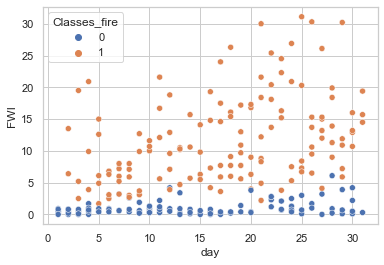

In [11]:
sns.set(style="whitegrid")  
sns.scatterplot(data=x, x="day", y="FWI", hue="Classes_fire")


<AxesSubplot:xlabel='DC', ylabel='FWI'>

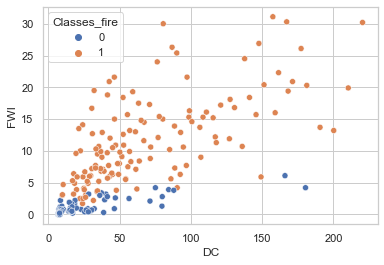

In [12]:
sns.set(style="whitegrid")  
sns.scatterplot(data=x, x="DC", y="FWI", hue="Classes_fire")

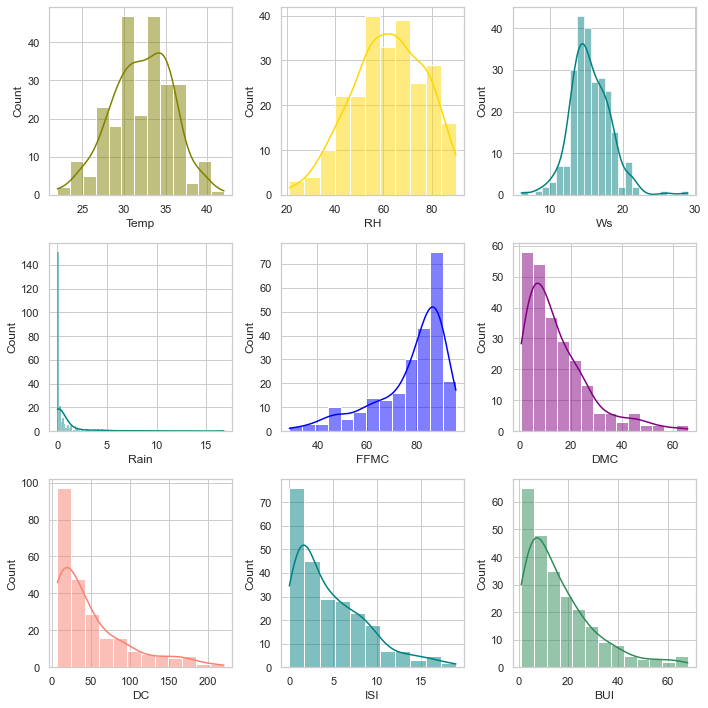

In [13]:
#make histogram
sns.set(style="whitegrid")  
fig,axs = plt.subplots(3,3, figsize = (10,10))
#sns.histplot(data=X, x="month", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=X, x="Temp", kde=True, color="olive", ax=axs[0, 0])
sns.histplot(data=X, x="RH", kde=True, color="gold", ax=axs[0, 1])
sns.histplot(data=X, x="Ws", kde=True, color="teal", ax=axs[0, 2])
sns.histplot(data=X, x="Rain", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=X, x="FFMC", kde=True, color="blue", ax=axs[1, 1])
sns.histplot(data=X, x="DMC", kde=True, color="purple", ax=axs[1,2])
sns.histplot(data=X, x="DC", kde=True, color="salmon", ax=axs[2,0])
sns.histplot(data=X, x="ISI", kde=True, color="teal", ax=axs[2,1])
sns.histplot(data=X, x="BUI", kde=True, color="seagreen", ax=axs[2,2])
fig.tight_layout()

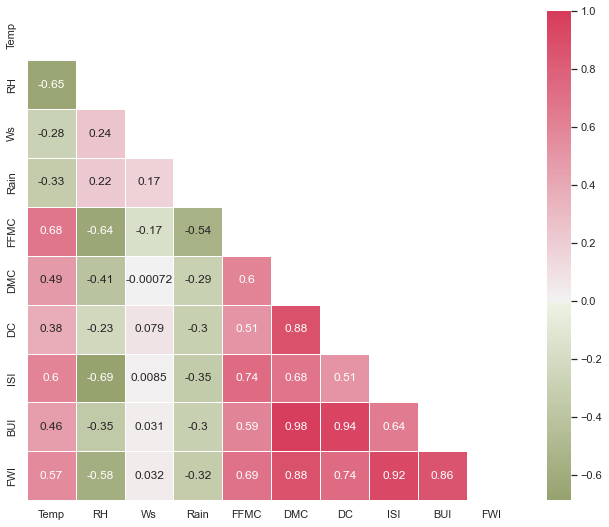

In [14]:
#Make correlation matrix

#https://seaborn.pydata.org/examples/many_pairwise_correlations.html
#https://sejal-kshirsagar.medium.com/6-tips-to-customize-seaborn-heatmaps-881207a61723 (couler)
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap = sns.diverging_palette(100, 5, as_cmap=True)

heatmap = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 1},annot=True)
#heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)


#plt.xlabel("my_x_axis_label") 
#plt.ylabel("my_y_axis_label") 

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

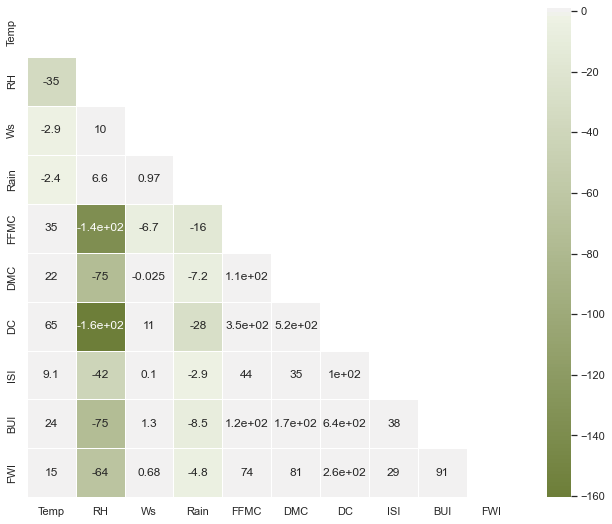

In [15]:
#Covariance
cov = X.cov()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(cov, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(100, 5, as_cmap=True)
heatmap = sns.heatmap(cov, mask=mask, cmap=cmap, vmax=1, center=0,square=True, linewidths=.5, cbar_kws={"shrink": 1},annot=True)
plt.savefig('cov.svg')

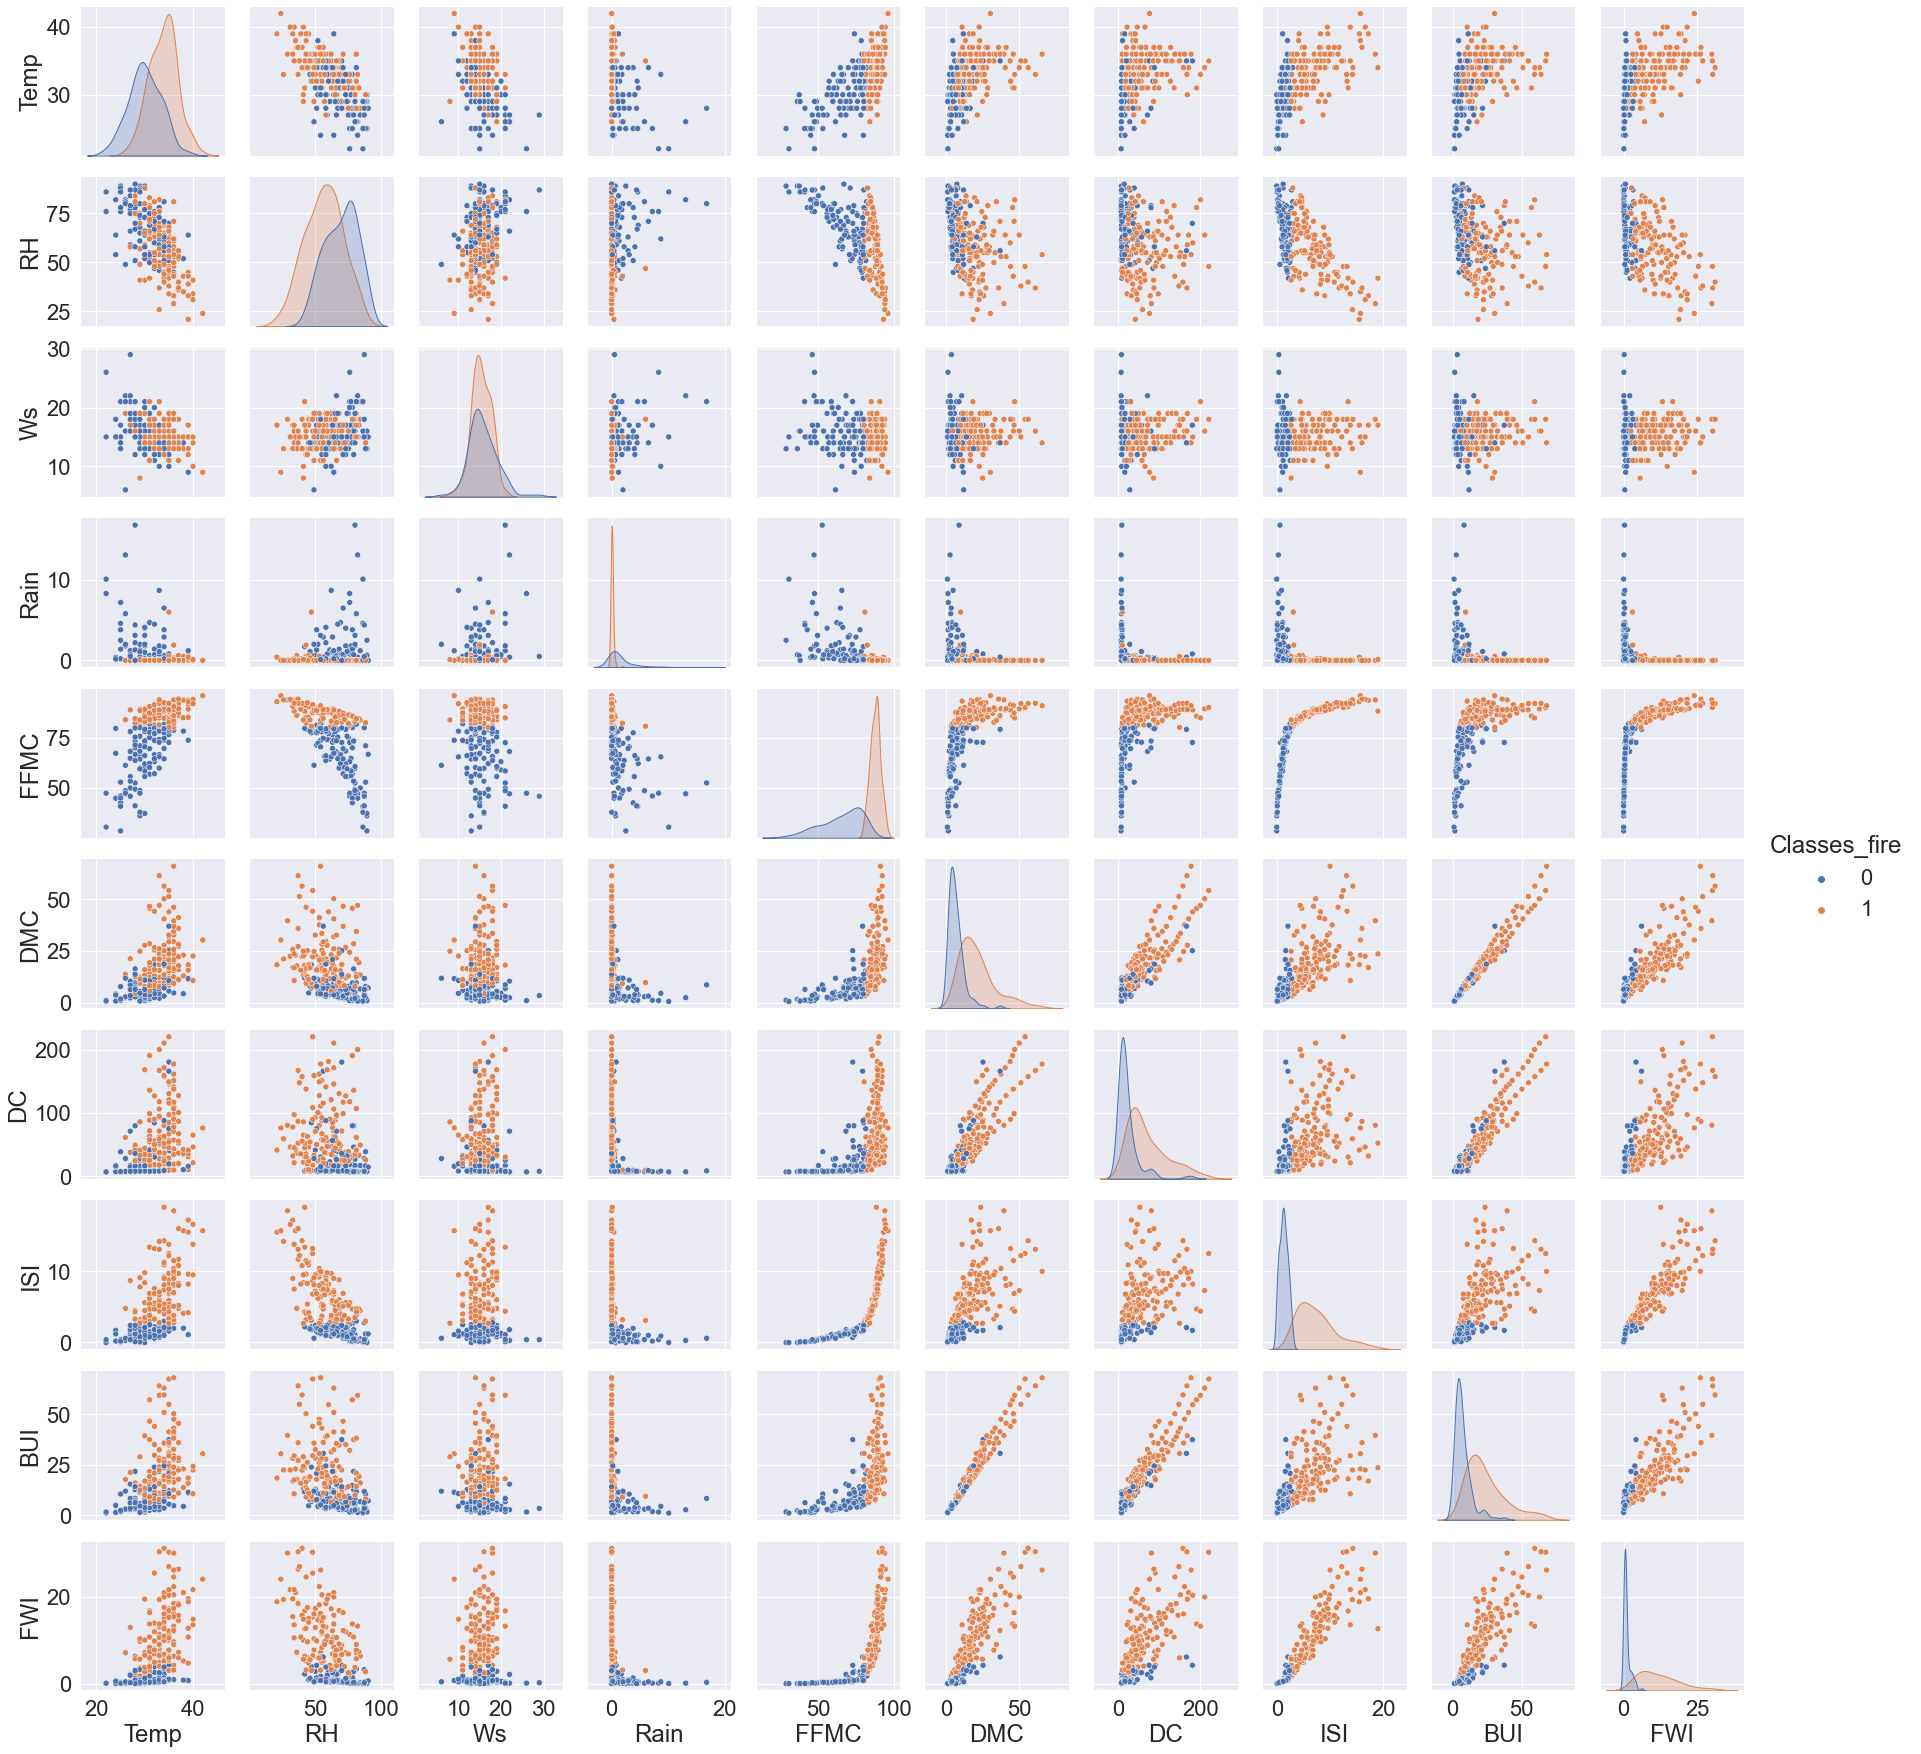

In [16]:
sns.set(font_scale=2)
sns.pairplot(G, hue="Classes_fire")

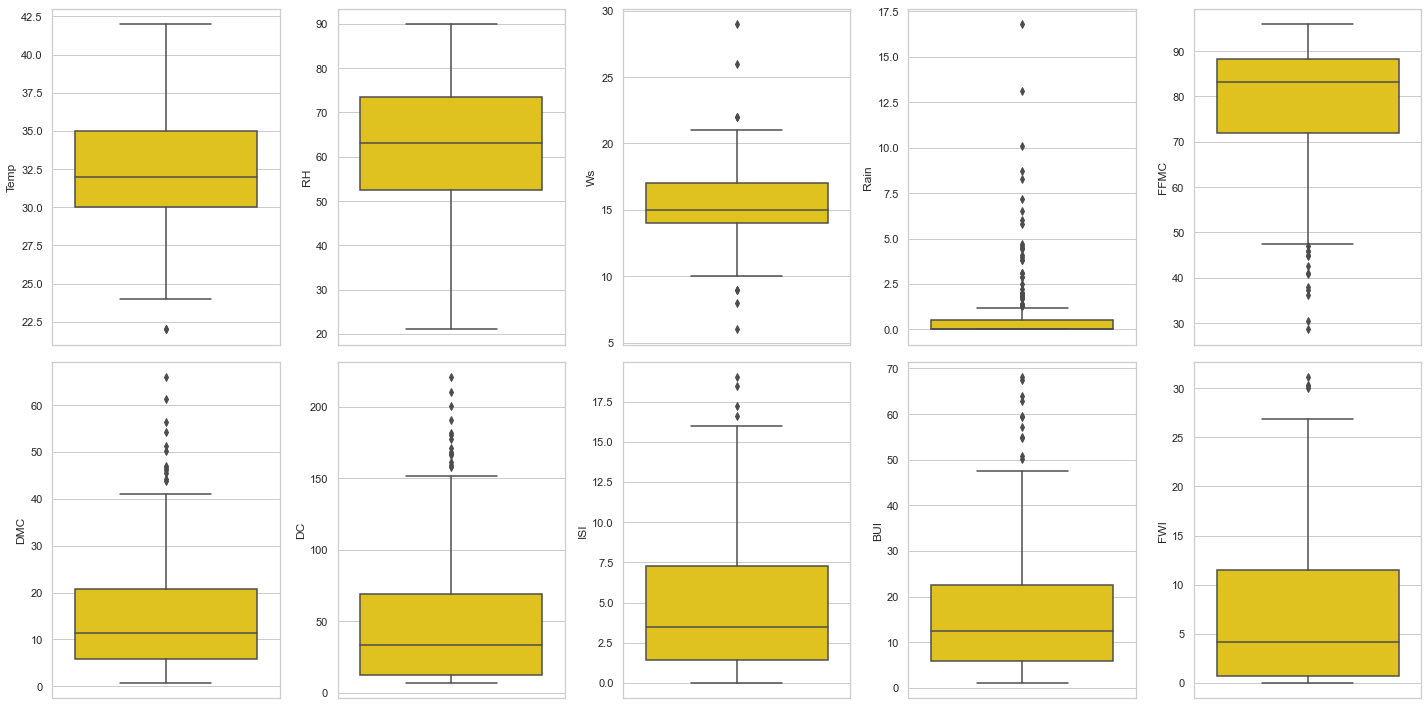

In [17]:
#make boxplot

sns.set(style="whitegrid")  
#sns.set(font_scale=2)

fig,axs = plt.subplots(2,5, figsize = (20,10))
#sns.histplot(data=X, x="month", kde=True, color="skyblue", ax=axs[0, 0])
sns.boxplot(data=X, y="Temp", color="gold", ax=axs[0, 0])
sns.boxplot(data=X, y="RH", color="gold", ax=axs[0, 1])
sns.boxplot(data=X, y="Ws", color="gold", ax=axs[0, 2])
sns.boxplot(data=X, y="Rain",color="gold", ax=axs[0, 3])
sns.boxplot(data=X, y="FFMC", color="gold", ax=axs[0, 4])
sns.boxplot(data=X, y="DMC", color="gold", ax=axs[1,0])
sns.boxplot(data=X, y="DC",  color="gold", ax=axs[1,1])
sns.boxplot(data=X, y="ISI", color="gold", ax=axs[1,2])
sns.boxplot(data=X, y="BUI", color="gold", ax=axs[1,3])
sns.boxplot(data=X, y="FWI", color="gold", ax=axs[1,4])
#axs.grid(True) 
#plt.legend(fontsize='x-large')
sns.set(style="whitegrid") 
fig.tight_layout()
plt.show()

In [18]:
#ax = x.plot.hist(column=["DC"], by="Classes_fire", figsize=(10, 8))

In [19]:
#ax = x.plot.hist(column=["BUI"], by="Classes_fire", figsize=(10, 8))

In [20]:
#ax = x.plot.hist(column=["Ws"], by="Classes_fire", figsize=(10, 8))

In [21]:
#ax = x.plot.hist(column=["Rain"], by="Classes_fire", figsize=(10, 8))

In [22]:
X.head()

,Temp,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.00,65.70,3.40,7.60,1.30,3.40,0.50
1,29,61,13,1.30,64.40,4.10,7.60,1.00,3.90,0.40
2,26,82,22,13.10,47.10,2.50,7.10,0.30,2.70,0.10
3,25,89,13,2.50,28.60,1.30,6.90,0.00,1.70,0.00
4,27,77,16,0.00,64.80,3.00,14.20,1.20,3.90,0.50


In [23]:
#make data frame for PCA, we wante no day but the class
New_data = x.drop('day', axis=1)
New_data = New_data.drop('year', axis=1)
New_data = New_data.drop('month', axis=1)
New_data.to_csv('data_NY.csv', index=False)



In [24]:
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure, legend, plot, show, title, xlabel, ylabel
from scipy.linalg import svd

In [25]:
#Remove the day
New_data = pd.read_csv("C:\\Users\\rebec\\OneDrive\\Skrivebord\\Machin\\02450Toolbox Python\\02450students-main-exercises-02450Toolbox_Python\\exercises\\02450Toolbox_Python\\New_pro\\data_NY.csv")
y = New_data.iloc[:, -1] 
New_data = New_data.drop('Classes_fire', axis=1)
print(New_data)
# X_normal = X - X.mean()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(New_data) #normalization
# apply pca to get three principal component
#pca = PCA(n_components=3)
#SVD
U, S, Vt = svd(X_scaled, full_matrices=False)
X_pca = X_scaled @ Vt.T
# transfer pca to dataframe
pca_df = pd.DataFrame(data=X_pca[:,0:3], columns=['PC1', 'PC2', 'PC3'])
pca_df

     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI
0             29  57  18  0.00 65.70  3.40  7.60 1.30  3.40 0.50
1             29  61  13  1.30 64.40  4.10  7.60 1.00  3.90 0.40
2             26  82  22 13.10 47.10  2.50  7.10 0.30  2.70 0.10
3             25  89  13  2.50 28.60  1.30  6.90 0.00  1.70 0.00
4             27  77  16  0.00 64.80  3.00 14.20 1.20  3.90 0.50
..           ...  ..  ..   ...   ...   ...   ...  ...   ...  ...
238           30  65  14  0.00 85.40 16.00 44.50 4.50 16.90 6.50
239           28  87  15  4.40 41.10  6.50  8.00 0.10  6.20 0.00
240           27  87  29  0.50 45.90  3.50  7.90 0.40  3.40 0.20
241           24  54  18  0.10 79.70  4.30 15.20 1.70  5.10 0.70
242           24  64  15  0.20 67.30  3.80 16.50 1.20  4.80 0.50

[243 rows x 10 columns]


,PC1,PC2,PC3
0,-2.05,-0.15,0.24
1,-2.21,-0.81,-0.23
2,-4.72,3.27,4.25
3,-4.31,0.94,-0.70
4,-2.54,0.27,-0.73
...,...,...,...
238,0.01,-0.22,-0.66
239,-3.64,1.20,0.25
240,-3.55,3.36,1.11
241,-1.90,0.15,0.13


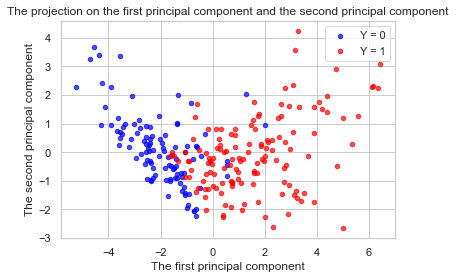

In [26]:

for target, color in zip([0, 1], ['blue', 'red']):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], c=color, label=f'Y = {target}', s=20, alpha=0.7)
plt.xlabel('The first principal component')
plt.ylabel('The second principal component')
plt.legend()
plt.title('The projection on the first principal component and the second principal component')
plt.show()


0.9665407752088515


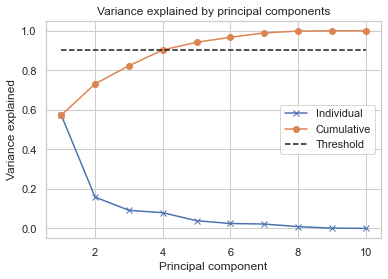

In [27]:
# Compute variance explained by principal components
rho = (S * S) / (S * S).sum()
print(sum(rho[0:6]))
threshold = 0.9

# Plot variance explained
plt.figure()
plt.grid()
plt.plot(range(1, len(rho) + 1), rho, "x-")
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), "o-")
plt.plot([1, len(rho)], [threshold, threshold], "k--")
plt.title("Variance explained by principal components")
plt.xlabel("Principal component")
plt.ylabel("Variance explained")
plt.legend(["Individual", "Cumulative", "Threshold"])
plt.grid()
plt.show()


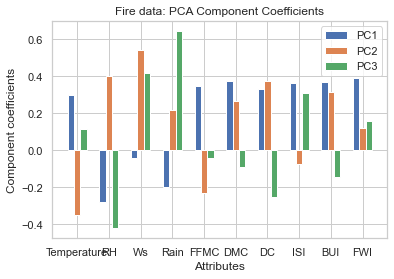

In [29]:
M = 10
attributeNames = New_data.columns[0:10] 
V = Vt.T
# percent of the variance. Let's look at their coefficients:
pcs = [0, 1, 2]
legendStrs = ["PC" + str(e + 1) for e in pcs]
c = ["r", "g", "b"]
bw = 0.2
r = np.arange(1, M + 1)
for i in pcs:
    plt.bar(r + i * bw, V[:, i], width=bw)
plt.xticks(r + bw, attributeNames)
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.legend(legendStrs)
plt.grid()
plt.title("Fire data: PCA Component Coefficients")
plt.grid()
plt.show()


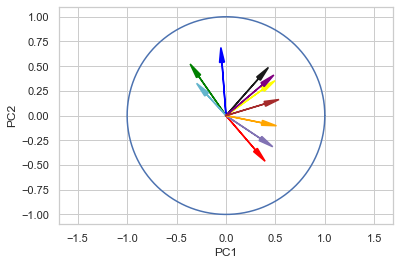

In [30]:
c = ['red', 'green', 'blue', 'c', 'm', 'yellow', 'k', 'orange', 'purple', 'brown']
i = 0
j = 1
#print("Attribute Names:", attributeNames)
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],head_width=0.05, head_length=0.15, fc=c[att], ec=c[att],lw=1.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
#plt.legend(attributeNames,loc='lower right')
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
#plt.title("Attribute coefficients")
plt.axis("equal")
plt.grid()
    
plt.show()

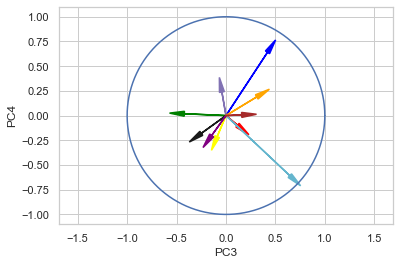

In [31]:
i = 2
j = 3
attributeNames = New_data.columns[0:10] 
#print("Attribute Names:", attributeNames)
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],head_width=0.05, head_length=0.15, fc=c[att], ec=c[att],lw=1.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
#plt.legend(attributeNames,loc='lower right')
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
#plt.title("Attribute coefficients")
plt.axis("equal")
plt.grid()
    
plt.show()

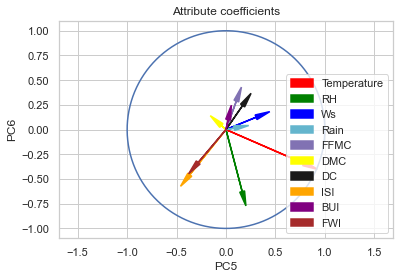

In [32]:
i = 4
j = 5
attributeNames = New_data.columns[0:10] 
#print("Attribute Names:", attributeNames)
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],head_width=0.05, head_length=0.15, fc=c[att], ec=c[att],lw=1.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
plt.legend(attributeNames,loc='lower right')
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
plt.title("Attribute coefficients")
plt.axis("equal")
plt.grid()
    
plt.show()

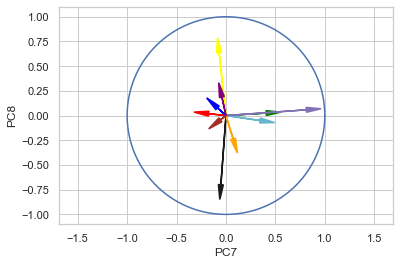

In [33]:
i = 6
j = 7
attributeNames = New_data.columns[0:10] 
#print("Attribute Names:", attributeNames)
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],head_width=0.05, head_length=0.15, fc=c[att], ec=c[att],lw=1.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
#plt.legend(attributeNames,loc='lower right')
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
#plt.title("Attribute coefficients")
plt.axis("equal")
plt.grid()
    
plt.show()

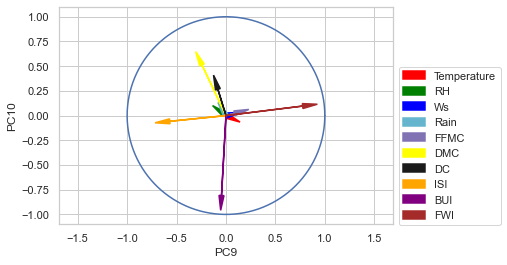

In [34]:
i = 8
j = 9
attributeNames = New_data.columns[0:10] 
#print("Attribute Names:", attributeNames)
for att in range(V.shape[1]):
    plt.arrow(0, 0, V[att, i], V[att, j],head_width=0.05, head_length=0.15, fc=c[att], ec=c[att],lw=1.5)
plt.xlim([-1, 1])
plt.ylim([-1, 1])
plt.xlabel("PC" + str(i + 1))
plt.ylabel("PC" + str(j + 1))
plt.legend(attributeNames,bbox_to_anchor=(1, 0.75))
plt.grid()
# Add a unit circle
plt.plot(np.cos(np.arange(0, 2 * np.pi, 0.01)), np.sin(np.arange(0, 2 * np.pi, 0.01)))
#plt.title("Attribute coefficients")
plt.axis("equal")
plt.grid()
    
plt.show()